## Download data from Zenodo

Our data is open-sourced at Zenodo with DOI: 10.5281/zenodo.11406538. Run the following code to download a subset of our data with Python3.

In [1]:
!python3 ./download_flickr.py

text_flickr8k.tar.xz: 100%|████████████████| 0.98M/0.98M [00:01<00:00, 628kiB/s]
Downloaded text_flickr8k.tar.xz
Extracted text_flickr8k.tar.xz to ./data/text
image_flickr8k.tar.xz: 100%|██████████████| 1.22G/1.22G [02:35<00:00, 8.40MiB/s]
Downloaded image_flickr8k.tar.xz
Extracted image_flickr8k.tar.xz to ./data/image
audio_flickr8k.tar.xz: 100%|██████████████| 2.73G/2.73G [05:34<00:00, 8.77MiB/s]
Downloaded audio_flickr8k.tar.xz
Extracted audio_flickr8k.tar.xz to ./data/audio
Flickr8k files downloaded and extracted to correct directories successfully.


If you wish to download all the data, you can uncomment the following code to download the whole dataset.

**WARNING:** This is a large dataset which contains about 157GB data in compression and could take up to 500GB after decompression. Please ensure your hard drive has the avaliable sapce before running.

In [2]:
#!python3 ./download_all.py

## Check aligned data sample
After downlaoding the data successfully, we can check the aligned data sample. Since different modalities' data are aligned and stored in the json file, we can load them using the following code.

In [3]:
import json

# Load the json data from flickr8k
with open('./data/text/flickr8k/update-final-5TextModel-flickr.json', 'r') as f:
    loaded_data = json.load(f)

Now we can check the actual aligned data after loading it.

In [4]:
print(loaded_data['data'][0])

{'image_id': '1000268201_693b08cb0e.jpg', 'id': 1, 'number': '#0', 'wav': '1000268201_693b08cb0e_0.wav', 'speaker_id': 19, 'uttid': '1000268201_693b08cb0e_0', 'text_model': 'llama2', 'audio_model': 'xtts2', 'image_model': 'sd-1.5-hyper', 'caption': 'A child in a pink dress is climbing up a set of stairs in an entry way .', 'gpt_caption': 'In the entryway, a set of stairs is being climbed by a little girl dressed in pink.', 'palm2_caption': ' A young girl, wearing a pink dress, ascends a staircase in an entryway.', 'llama2_caption': 'A little girl in a frilly pink dress is scaling the stairs, her tiny feet pattering against the steps.', 'mixtral_caption': 'A child wearing a pink dress can be seen ascending a flight of stairs located in a foyer.', 'rwkv_caption': ' A young girl adorned in a pink dress is ascending a set of stairs situated in an entryway.'}


We load the aligned data successfully, now we can get a random data and its aligned multimodal data via the json file. 

In [5]:
import random
from IPython.display import Image, Audio, display

# Load the image path mapping
with open('./data/image_path.json', 'r') as f:
    path_data = json.load(f)

# Randomly pick an index between 1 and 7800
random_index = random.randint(1, 7800)

# Select the data instance
data_instance = loaded_data['data'][random_index]

# Get the models used
image_model = data_instance['image_model']
voice_model = data_instance['audio_model']
text_model = data_instance['text_model']

# We are using the flickr8k as an example here
dataset = 'flickr8k'

# Extract image_id and wav
image_id = data_instance['image_id']
wav_file = data_instance['wav']

# Construct file paths for generated data
generated_image_path = f"./data/image/flickr8k/{path_data['flickr8k'][image_model]}/SD_{image_id}"
generated_audio_path = f"./data/audio/flickr8k/{voice_model}/{voice_model}_{wav_file}"

# Construct file paths for real data
real_image_path = f"./data/image/flickr8k/real/{image_id}"
real_audio_path = f"./data/audio/flickr8k/real/{wav_file}"

Let's print the original and real version of the data first.

Real Data:


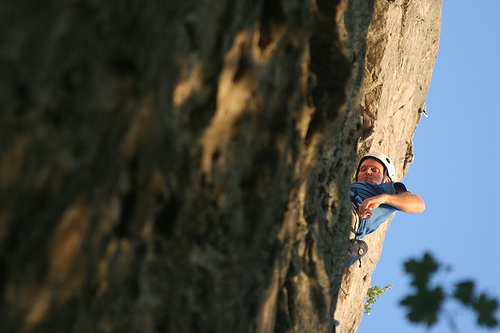

Original Caption: A climber wearing a white helmet is perched on the side of a rock face .


In [6]:
# Display the real image and play the real audio
print("Real Data:")
display(Image(filename=real_image_path))
display(Audio(filename=real_audio_path))
print("Original Caption:", data_instance['caption'])

Then we can also print the machine-generated pair of the real portion data.


Generated Data:


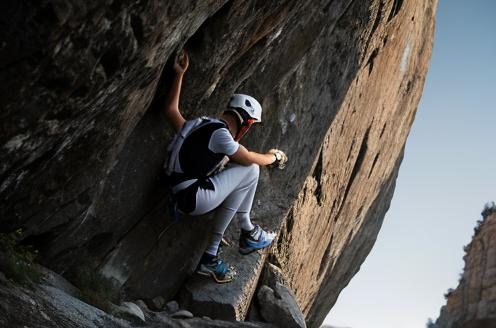

Generated Caption: A white helmet-wearing climber is perched on the side of a rock face.


In [7]:
# Display the generated image and play the generated audio
print("\nGenerated Data:")
display(Image(filename=generated_image_path))
display(Audio(filename=generated_audio_path))
print("Generated Caption:", data_instance[f'{text_model}_caption'])